# <center><u>LOGISTIC REGRESSION</u></center>

Hi aspirant, You have already learned simple, multiple and some advance regression techniques. Now lets jump to another hands-on assignment on Logistic regression.

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).

Do watch this video for its indepth conceptual clarity: https://www.youtube.com/watch?v=L_xBe7MbPwk

Also watch this video to know math behind logistic regression: https://www.youtube.com/watch?v=uFfsSgQgerw

## Problem statement:

#### Telecom Churn Case Study

With 21 predictor variables we need to predict whether a particular customer will switch to another telecom provider or not. In telecom terminology, this is referred to as churning and not churning, respectively.


So smile please and lets get started with this amazing assignment.

### Importing and Merging Data
<p style='text-align: right;'> 4 points</p>


In [902]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np


In [903]:
# Importing all datasets
churn_data = pd.read_csv('/content/churn_data.csv')
customer_data = pd.read_csv('/content/customer_data.csv')
internet_data = pd.read_csv('/content/internet_data.csv')

In [904]:
#Merging churn_data and customer_data on 'customerID' using inner join on customerID
df_1 = pd.merge(churn_data, customer_data, how='inner', on = 'customerID')

In [905]:
#Final dataframe with all predictor variables (merging df_1 and internet_data on 'customerID')
telecom = pd.merge(df_1, internet_data, how = 'inner', on = 'customerID')

### Let's understand the structure of our dataframe
<p style='text-align: right;'> 3 points</p>


In [906]:
# Let's see the head of our master dataset
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


In [907]:
#Lets see statistical description for our master data
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [908]:
# Let's see the type of each column
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


## Data Preparation
<p style='text-align: right;'> 10 points</p>


In [909]:
# Converting Yes to 1 and No to 0 using map
telecom['PhoneService'] = telecom['PhoneService'].map({'Yes' : 1, 'No': 0})
telecom['PaperlessBilling'] = telecom['PaperlessBilling'].map({'Yes': 1, 'No': 0})
telecom['Churn'] = telecom['Churn'].map({'Yes' : 1, 'No' : 0})
telecom['Partner'] = telecom['Partner'].map({'Yes' : 1, 'No' : 0})
telecom['Dependents'] = telecom['Dependents'].map({'Yes' : 1, 'No' : 0})
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,No,Fiber optic,No,No,No,No,No,No


### Dummy Variable Creation

As you can see there are many textual information in our data set. Lets do encoding for these classes using get_dummies() function.

Note: use prefix='column_name' where column_name is the column whose encoding has to be done.

In [910]:
# Creating a dummy variable for the variable 'Contract' and keeping drop_first=True
cont = pd.get_dummies(telecom['Contract'], prefix = 'Contract', drop_first=True)
#Adding the results to the master dataframe i.e telecom
telecom = pd.concat([telecom, cont], axis = 1)

# Creating a dummy variable for the variable 'PaymentMethod' and keeping drop_first=True
pm = pd.get_dummies(telecom['PaymentMethod'], prefix = 'PaymentMethod', drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom, pm], axis = 1)

# Creating a dummy variable for the variable 'gender' and keeping drop_first=True
gen = pd.get_dummies(telecom['gender'], prefix = 'gender', drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom, gen], axis = 1)

# Creating a dummy variable for the variable 'MultipleLines' and keeping drop_first=True
ml = pd.get_dummies(telecom['MultipleLines'], prefix = 'MultipleLines')

#  dropping MultipleLines_No phone service column from ml
ml1 = ml.drop(['MultipleLines_No phone service'], axis = 1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom, ml1], axis = 1)

# Creating a dummy variable for the variable 'InternetService' and keeping drop_first=True
iser = pd.get_dummies(telecom['InternetService'], prefix = 'InternetService', drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom, iser], axis = 1)

# Creating a dummy variable for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom['OnlineSecurity'], prefix = 'OnlineSecurity')
#drop OnlineSecurity_No internet service column from os
os1= os.drop(['OnlineSecurity_No internet service'], axis = 1)
#Adding os1 to the master dataframe
telecom = pd.concat([telecom, os1], axis = 1) 

# Creating a dummy variable for the variable 'OnlineBackup' and keeping drop_first=True
ob = pd.get_dummies(telecom['OnlineBackup'], prefix = 'OnlineBackup')
#dropping OnlineBackup_No internet service from ob
ob1 = ob.drop(['OnlineBackup_No internet service'], axis = 1)
#Adding the results(ob1) to the master dataframe
telecom = pd.concat([telecom, ob1], axis = 1)

# Creating a dummy variable for the variable 'DeviceProtection' and keeping drop_first=True
dp = pd.get_dummies(telecom['DeviceProtection'], prefix = 'DeviceProtection')
#dropping DeviceProtection_No internet service from dp
dp1 = dp.drop(['DeviceProtection_No internet service'], axis = 1)
#Adding the results(dp1) to the master dataframe
telecom = pd.concat([telecom, dp1], axis = 1)

# Creating a dummy variable for the variable 'TechSupport' and keeping drop_first=True
ts = pd.get_dummies(telecom['TechSupport'], prefix = 'TechSupport')
#dropping TechSupport_No internet service from ts
ts1 = ts.drop(['TechSupport_No internet service'], axis = 1)
#Adding the results(ts1) to the master dataframe
telecom = pd.concat([telecom, ts1], axis = 1)

# Creating a dummy variable for the variable 'StreamingTV' and keeping drop_first=True
st = pd.get_dummies(telecom['StreamingTV'], prefix = 'StreamingTV')
#dropping StreamingTV_No internet service from st
st1 = st.drop(['StreamingTV_No internet service'], axis = 1)
#Adding the results(st1) to the master dataframe
telecom = pd.concat([telecom, st1], axis = 1)

# Creating a dummy variable for the variable 'StreamingMovies' and keeping drop_first=True 
sm =pd.get_dummies(telecom['StreamingMovies'], prefix = 'StreamingMovies')
#dropping StreamingMovies_No internet service from sm
sm1 = sm.drop(['StreamingMovies_No internet service'], axis = 1)
#Adding the results(sm1) to the master dataframe
telecom = pd.concat([telecom, sm1], axis = 1)

### Dropping the repeated variables

Since We have already created dummies for the below variables
    
    'Contract',
    'PaymentMethod',
    'gender',
    'MultipleLines',
    'InternetService', 
    'OnlineSecurity', 
    'OnlineBackup', 
    'DeviceProtection',
    'TechSupport', 
    'StreamingTV', 
    'StreamingMovies'
so we can drop them off as they are now repeated in our master dataset


In [911]:
# drop all duplicate columns
telecom = telecom.drop(columns = ['Contract',
'PaymentMethod',
'gender',
'MultipleLines',
'InternetService', 
'OnlineSecurity', 
'OnlineBackup', 
'DeviceProtection',
'TechSupport', 
'StreamingTV', 
'StreamingMovies'], axis = 1)

The TotalCharges variable was imported as a string we need to convert it to numeric type<br>
Hint: Use pandas.to_numeric() function. Refer:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html

In [912]:

# convert to numeric
telecom['TotalCharges']=telecom['TotalCharges'].apply(pd.to_numeric, errors = 'coerce')

In [913]:
# again check data type informationof our master dataset
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

Now we can see we have all variables as integer.

### Checking for Outliers
<p style='text-align: right;'> 4 points</p>


Checking for outliers in the continuous variables like 'tenure','MonthlyCharges','SeniorCitizen','TotalCharges'


In [914]:
# Getting all continues variables in separate dataframe
num_telecom = telecom[['tenure', 'MonthlyCharges', 'SeniorCitizen', 'TotalCharges']]

In [915]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
num_telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.850000,0.000000,3794.737500
max,72.000000,118.750000,1.000000,8684.800000


From the distribution shown above, you can see that there no outliner in your data as the numbers are gradually increasing.

### Checking for Missing Values and Inputing Them

<p style='text-align: right;'> 5 points</p>


In [916]:
# Checking total missing values (column-wise)
telecom.isna().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
MultipleLines_No                          0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

In [917]:
# Checking the percentage of missing values
round(telecom.isna().sum()*100/len(telecom), 2)

customerID                               0.00
tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Churn                                    0.00
SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
Contract_One year                        0.00
Contract_Two year                        0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
gender_Male                              0.00
MultipleLines_No                         0.00
MultipleLines_Yes                        0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
OnlineSecurity_No                        0.00
OnlineSecurity_Yes                

It means that 11/7043 = 0.001561834 i.e 0.15%, the best option to get rid of these null values in this scenario is to remove these observations from the analysis

In [918]:
# Removing NaN form TotalCharges rows
telecom = telecom.dropna(axis = 0, subset = telecom.columns.tolist())

In [919]:
# Lets Check percentage of missing values after removing the missing values
round(telecom.isna().sum()*100/len(telecom), 2)

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBack

Now we don't have any missing values

### Feature Standardisation

<p style='text-align: right;'> 6 points</p>


Standardization is one of the scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

Here’s the formula for standardization:


![image.png](attachment:image.png)

![image-3.png](attachment:image-3.png)


We are sure that you have got this Scaling concept clear from your previous assignements. But for the sake of your revision we
provide you with following video. https://www.youtube.com/watch?v=mnKm3YP56PY

In [920]:
# Get telecom data type information
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7032 non-null   object 
 1   tenure                                 7032 non-null   int64  
 2   PhoneService                           7032 non-null   int64  
 3   PaperlessBilling                       7032 non-null   int64  
 4   MonthlyCharges                         7032 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7032 non-null   int64  
 7   SeniorCitizen                          7032 non-null   int64  
 8   Partner                                7032 non-null   int64  
 9   Dependents                             7032 non-null   int64  
 10  Contract_One year                      7032 non-null   uint8  
 11  Cont

In [921]:
# Getting all desired continues variables like 'tenure','MonthlyCharges' and 'TotalCharges' into one dataframe.
df = telecom[['tenure', 'MonthlyCharges', 'TotalCharges']]

In [922]:
# Standardising above continuous features
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
std_df = pd.DataFrame(scaling.fit_transform(df), columns = df.columns.tolist())
std_df

,tenure,MonthlyCharges,TotalCharges
0,-1.280248,-1.161694,-0.994194
1,0.064303,-0.260878,-0.173740
2,-1.239504,-0.363923,-0.959649
3,0.512486,-0.747850,-0.195248
4,-1.239504,0.196178,-0.940457
...,...,...,...
7027,-0.343137,0.664868,-0.129180
7028,1.612573,1.276493,2.241056
7029,-0.872808,-1.170004,-0.854514
7030,-1.158016,0.319168,-0.872095


In [923]:
# Dropping 'tenure','MonthlyCharges' and 'TotalCharges' from telecom as we want to add the standardised fetaures 
telecom = telecom.drop(columns = ['tenure', 'MonthlyCharges', 'TotalCharges'], axis = 1)

In [924]:
# Add std_df into telecom
telecom = pd.concat([telecom.reset_index(drop=True), std_df.reset_index(drop = True)], axis = 1)

In [925]:
# print telecom tail
telecom.tail()

,customerID,PhoneService,PaperlessBilling,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,MultipleLines_No,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,tenure,MonthlyCharges,TotalCharges
7027,6840-RESVB,1,1,0,0,1,1,1,0,0,0,1,1,0,1,0,0,0,1,1,0,0,1,0,1,0,1,0,1,-0.343137,0.664868,-0.129180
7028,2234-XADUH,1,1,0,0,1,1,1,0,1,0,0,0,0,1,1,0,1,0,0,1,0,1,1,0,0,1,0,1,1.612573,1.276493,2.241056
7029,4801-JZAZL,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,-0.872808,-1.170004,-0.854514
7030,8361-LTMKD,1,1,1,1,1,0,0,0,0,0,1,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,-1.158016,0.319168,-0.872095
7031,3186-AJIEK,1,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,1.368109,1.357932,2.012344


### Checking the Churn Rate

<p style='text-align: right;'> 2 points</p>


In [926]:
#caluclating total churn percentage in our master dataframe
churn = telecom['Churn'].sum()/len(telecom)*100

In [927]:
# print churn
churn

26.578498293515356

We have almost 27% churn rate

## Model Building

<p style='text-align: right;'> 11 points</p>

Let's start by splitting our data into a training set and a test set.

In [928]:
# Putting feature variable to X. drop 'customerID' from features as its not informative for our prediction
X = telecom.drop(['customerID','Churn'], axis = 1)

# Putting response variable to y
y = telecom['Churn']

In [929]:
# print y head
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

### Running Your First Training Model

In [930]:
# import statsmodels api as sm
import statsmodels.api as sm

Statsmodels provides a Logit() function for performing logistic regression. The Logit() function accepts y and X as parameters and returns the Logit object. The model is then fitted to the data.

Reference: https://www.youtube.com/watch?v=JwUj5M8QY4U

### Splitting Data into Training and Test Sets

In [931]:
# import train_test_split module
from sklearn.model_selection import train_test_split

In [932]:
# adding constant to X
X= sm.add_constant(X)

# Splitting the data into train and test with train_size=0.7 and random_state=100
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100)


In [933]:
# Logistic regression model
logm1 = sm.Logit(y_train, X_train)

#fitting and printing summary
res = logm1.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.407291
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                          Logit   Df Residuals:                     4898
Method:                           MLE   Df Model:                           23
Date:                Mon, 23 Aug 2021   Pseudo R-squ.:                  0.2912
Time:                        19:01:33   Log-Likelihood:                -2004.7
converged:                       True   LL-Null:                       -2828.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.5093   8.8

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


Hey buddy, from above you can see that there few statistically insignificant variables present in our dataset. Lets drop them off.

Here drop those variables which has less than 70% confidence to reject the null hyposthesis looking into P values.

Few insignificant variables we can see from above stats summary are:
 
    partner
    Dependents	
    PaymentMethod_Electronic check	
    gender_Male
    InternetService_No
    DeviceProtection_no
    DeviceProtection_Yes
    
So lets drop them off from X

Note: We are not dropping const variable as it is required for OLS model building

In [934]:
# drop above features from X
X.drop(['Partner', 'Dependents', 'PaymentMethod_Electronic check', 'gender_Male', 'InternetService_No', 'DeviceProtection_No', 'DeviceProtection_Yes'], inplace = True, axis = 1)

If you still not sure about what is statistically significant values then check uout this video:
    https://www.youtube.com/watch?v=6psBul7K2gw

### Correlation Matrix

<p style='text-align: right;'> 2 points</p>


In [935]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sn



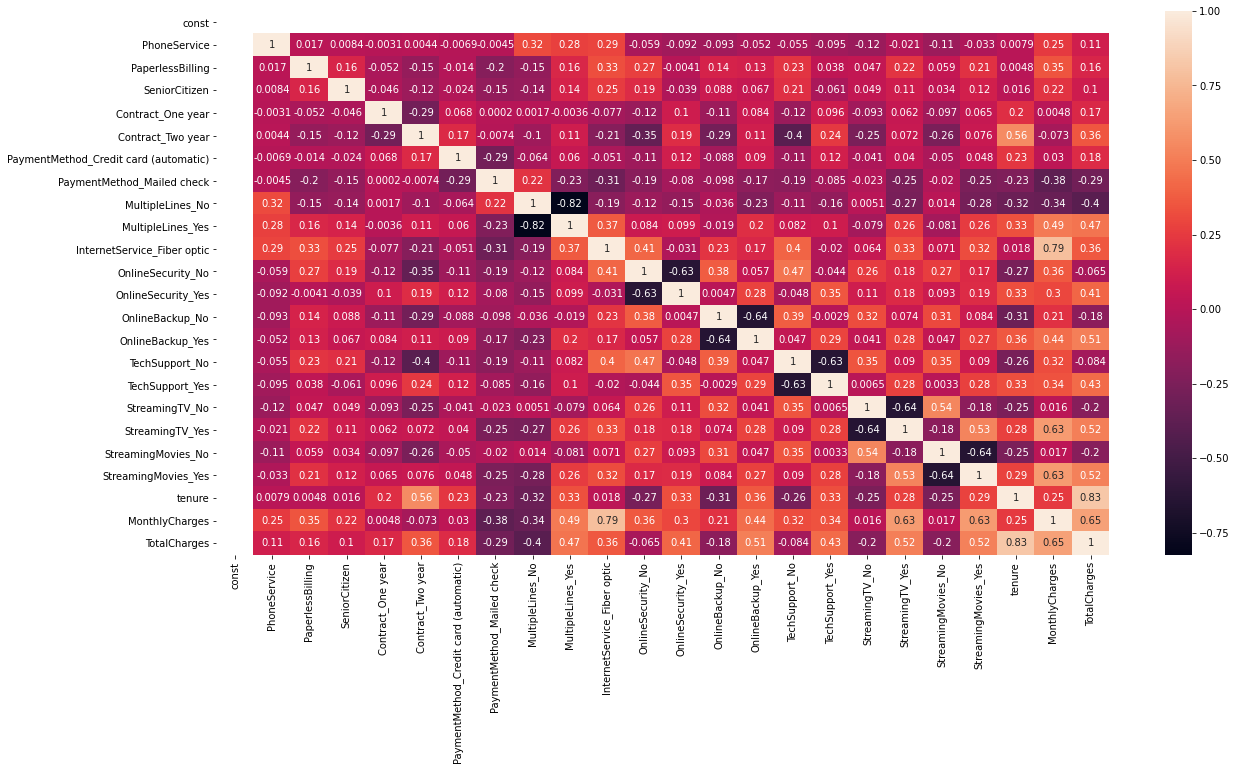

In [936]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sn.heatmap(X.corr(), annot = True)
plt.show()

### Dropping highly correlated variables.

<p style='text-align: right;'> 4 points</p>


Check video: https://www.youtube.com/watch?v=FndwYNcVe0U

In [937]:
# Write a correlation function to drop correllation function to remove highly correlated variables (>70%)
def correlation(dataset, threshold):
    col_corr = set()
    corr_mat = dataset.corr()
    for i in range(len(corr_mat.columns)):
      for j in range(i):
        if abs(corr_mat.iloc[i, j]) > threshold:
          col_name = corr_mat.columns[i]
          col_corr.add(col_name)

    return col_corr

In [938]:
#get correlation function output with dataset as X and threshold as 0.7
corr_features = correlation(X, 0.7)

# print length of corr_features
len(corr_features)

3

In [939]:
#print corr_features
print(corr_features)

{'MonthlyCharges', 'MultipleLines_Yes', 'TotalCharges'}


In [940]:
# Lets drop the above variables from X
X.drop(columns=['MultipleLines_Yes', 'MonthlyCharges', 'TotalCharges'], axis = 1, inplace = True)


## Dropping Variable with high VIF

<p style='text-align: right;'> 5 points</p>


Lets check multicollinearity using Variance inflation factor too!

Reference: https://www.youtube.com/watch?v=6JpmgzCAusI

In [941]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# empty dataframe
vif=pd.DataFrame()

#variables names with all variables in column X
vif["variables"] = X.columns

# Vif scores for corresponding features
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = vif.sort_values(by = 'VIF',ascending = True)


/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [942]:
# print vif
vif

,variables,VIF
3,SeniorCitizen,1.111546
6,PaymentMethod_Credit card (automatic),1.167402
2,PaperlessBilling,1.205664
7,PaymentMethod_Mailed check,1.368714
1,PhoneService,1.451676
8,MultipleLines_No,1.456002
4,Contract_One year,1.604685
9,InternetService_Fiber optic,1.988001
5,Contract_Two year,2.585350
20,tenure,2.631860


Lets drop variables which are having infinite vif scores.

they are:
    
    OnlineSecurity_No
    OnlineSecurity_Yes
    OnlineBackup_No
    OnlineBackup_Yes
    TechSupport_No
    TechSupport_Yes
    StreamingTV_No
    StreamingTV_Yes
    StreamingMovies_No
    StreamingMovies_Yes

In [943]:
# Lets drop above variables also from X
X.drop(columns = ['OnlineSecurity_No','OnlineSecurity_Yes','OnlineBackup_No', 'OnlineBackup_Yes','TechSupport_No','TechSupport_Yes','StreamingTV_No', 'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes'], axis = 1, inplace = True)



### Checking the Correlation Matrix again

After dropping highly correlated variables now let's check the correlation matrix again.

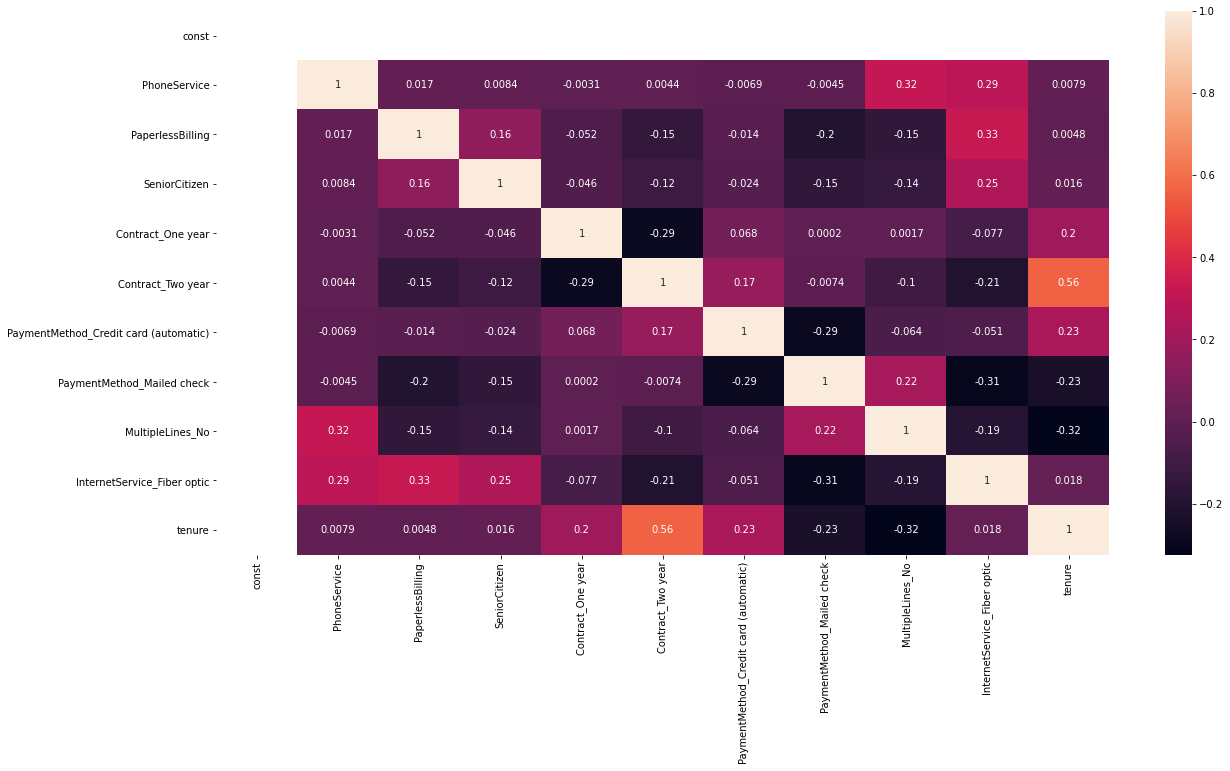

In [944]:
#plot heatmap
plt.figure(figsize = (20,10))        # Size of the figure
sn.heatmap(X.corr(), annot = True)
plt.show()

### Re-Running the Model

<p style='text-align: right;'> 3 points</p>


Now let's run our model again after dropping highly correlated variables

In [945]:
# Splitting the data into train and test with train_size=0.7 and random_state=100 again
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100)

# building model again
logm2 = sm.Logit(y_train, X_train)
res = logm2.fit()
#fitting model and printing summary
print(res.summary())


Optimization terminated successfully.
         Current function value: 0.417905
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                          Logit   Df Residuals:                     4911
Method:                           MLE   Df Model:                           10
Date:                Mon, 23 Aug 2021   Pseudo R-squ.:                  0.2727
Time:                        19:01:37   Log-Likelihood:                -2056.9
converged:                       True   LL-Null:                       -2828.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.2686      

Now you can see after removing all multicollinear features we got all P values to zero,  so now we can say that all features are statistically significant.

### Feature Selection Using RFE

<p style='text-align: right;'> 5 points</p>


Lets do feature selection using LogisticRegression with RFE

In [946]:
# import RFE and LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


# Initiate LogisticRegression()
logreg = LogisticRegression()

 # Initialise RFE 
rfe = RFE(estimator=logreg)

# fitting RFE 
rfe.fit(X_train, y_train)

# Printing the boolean results
print(rfe.support_)     
# Printing the ranking
print(rfe.ranking_)           

[False  True False False  True  True False False False  True  True]
[7 1 3 2 1 1 5 4 6 1 1]


In [947]:
# printing column names which were suppported by RFE
X_train.columns[rfe.support_]

Index(['PhoneService', 'Contract_One year', 'Contract_Two year',
       'InternetService_Fiber optic', 'tenure'],
      dtype='object')

In [948]:
# Variables selected by RFE 
col = X_train.columns[rfe.support_].tolist()

In [949]:
# Let's run the model using the selected variables but this time we will use Logistic Regression

#initialise Logistic Regression
logsk = LogisticRegression()

#fitting model using above columns as input
logsk = logsk.fit(X_train[col], y_train)

In [950]:
#recreating the model with StatsModels with RFE selecte columns
logm3 = sm.Logit(y_train, X_train[col])

# Fitting and printing model summary
res = logm3.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.435736
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                          Logit   Df Residuals:                     4917
Method:                           MLE   Df Model:                            4
Date:                Mon, 23 Aug 2021   Pseudo R-squ.:                  0.2417
Time:                        19:01:37   Log-Likelihood:                -2144.7
converged:                       True   LL-Null:                       -2828.2
Covariance Type:            nonrobust   LLR p-value:                1.009e-294
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
PhoneService                   -1.6604      0.085    -19.428      0.000   

### Making Predictions

<p style='text-align: right;'> 14 points</p>


In [951]:
# Predicted probabilities
y_pred = logsk.predict_proba(X_test[col])

In [952]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
y_pred_df

,0,1
0,0.465497,0.534503
1,0.707265,0.292735
2,0.986537,0.013463
3,0.299559,0.700441
4,0.977437,0.022563
...,...,...
2105,0.975264,0.024736
2106,0.950746,0.049254
2107,0.990381,0.009619
2108,0.701747,0.298253


In [953]:
# Converting to column dataframe
y_pred_1 = pd.DataFrame(y_pred_df[1].values)

In [954]:
# Let's see the head
y_pred_1.head()

,0
0,0.534503
1,0.292735
2,0.013463
3,0.700441
4,0.022563


In [955]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [956]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index
y_test_df

,Churn,CustID
939,0,939
3724,1,3724
1756,0,1756
2278,1,2278
1867,0,1867
...,...,...
1285,0,1285
3502,0,3502
6754,0,6754
3592,0,3592


In [957]:
# Removing index for both dataframes to append them side by side 
y_test_df.reset_index(drop = True, inplace = True)
y_pred_1.reset_index(drop = True, inplace = True)

In [958]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1], axis = 1)
y_pred_final

,Churn,CustID,0
0,0,939,0.534503
1,1,3724,0.292735
2,0,1756,0.013463
3,1,2278,0.700441
4,0,1867,0.022563
...,...,...,...
2105,0,1285,0.024736
2106,0,3502,0.049254
2107,0,6754,0.009619
2108,0,3592,0.298253


In [959]:
# Renaming the column 
y_pred_final = y_pred_final.rename(columns={0: "Churn_Probability"})

In [960]:
#printing y_pred_final
y_pred_final

,Churn,CustID,Churn_Probability
0,0,939,0.534503
1,1,3724,0.292735
2,0,1756,0.013463
3,1,2278,0.700441
4,0,1867,0.022563
...,...,...,...
2105,0,1285,0.024736
2106,0,3502,0.049254
2107,0,6754,0.009619
2108,0,3592,0.298253


In [961]:
# Rearranging the columns
y_pred_final = y_pred_final[['CustID', 'Churn', 'Churn_Probability']]

In [962]:
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Churn,Churn_Probability
0,939,0,0.534503
1,3724,1,0.292735
2,1756,0,0.013463
3,2278,1,0.700441
4,1867,0,0.022563


In [963]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final['Churn_Probability'].map(lambda x: 1 if x > 0.5 else 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [964]:
# Let's see the head
y_pred_final.head()


,CustID,Churn,Churn_Probability,predicted
0,939,0,0.534503,1
1,3724,1,0.292735,0
2,1756,0,0.013463,0
3,2278,1,0.700441,1
4,1867,0,0.022563,0


### Model Evaluation

<p style='text-align: right;'> 11 points</p>


Choosing the right metric is very important in any classification problem.
To know about various metrics for classification model evaluation refer: https://www.youtube.com/watch?v=aWAnNHXIKww
and https://www.youtube.com/watch?v=A_ZKMsZ3f3o


Lets check Confusion matrix for model evaluation


In [965]:
# import metrics 
from sklearn import metrics

In [966]:
# Lets check what all things python provides us in confusion matrix using help function.
help(metrics.confusion_matrix)


Help on function confusion_matrix in module sklearn.metrics._classification:

confusion_matrix(y_true, y_pred, labels=None, sample_weight=None, normalize=None)
    Compute confusion matrix to evaluate the accuracy of a classification.
    
    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` and
    predicted to be in group :math:`j`.
    
    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.
    
    Read more in the :ref:`User Guide <confusion_matrix>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.
    
    labels : array-like of shape (n_classes), default=Non

You can also refer this short video to undertand confusion metrics https://www.youtube.com/watch?v=Kdsp6soqA7o

Also its practical approach using python given in https://www.youtube.com/watch?v=TtIjAiSojFE

In [967]:
# get Confusion matrix 
confusion = metrics.confusion_matrix(y_pred_final['Churn'], y_pred_final['predicted'])

#print confusion matrix
confusion

array([[1363,  165],
       [ 303,  279]])

In [968]:
# meaning of above confusion matrix is

# Predicted     not_churn    churn
# Actual
# not_churn        1363      165
# churn            273       309

In [969]:
#Let's check the overall accuracy.
print(metrics.accuracy_score(y_pred_final['Churn'], y_pred_final['predicted']))

0.7781990521327015


In [970]:
# Lets check true positive ,true negatives,false positives and false negatives

TP = confusion[1][1]# true positive 
TN = confusion[0][0]# true negatives
FP = confusion[0][1]# false positives
FN = confusion[1][0]# false negatives

In [971]:
# Let's see the sensitivity of our logistic regression model
print(TP/(TP+FN))

0.4793814432989691


In [972]:
# Let us calculate specificity
print(TN/(TN+FP))

0.8920157068062827


In [973]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/(TN+FP))

0.10798429319371727


In [974]:
# positive predictive value 
print(TP/(TP+FP))

0.6283783783783784


In [975]:
# Negative predictive value
print(TN/(TN+FN))

0.8181272509003601


You can also use classification_report to get precision, recall, f1-score, support

In [976]:
# import classification report
from sklearn.metrics import classification_report
# print classification_report
print(classification_report(y_pred_final['Churn'], y_pred_final['predicted']))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1528
           1       0.63      0.48      0.54       582

    accuracy                           0.78      2110
   macro avg       0.72      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110



### ROC Curve

<p style='text-align: right;'> 1 points</p>


An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [977]:
# Here we have given you a function to plot ROC curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

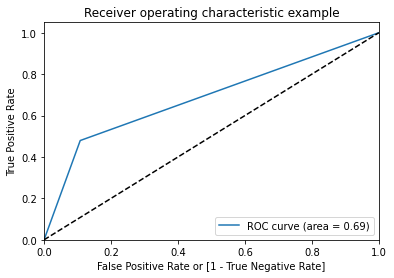

[0.         0.10798429 1.        ]
[0.         0.47938144 1.        ]
[2 1 0]


In [978]:
# Use above function to plot ROC curve
fpr, tpr, thres = draw_roc(y_pred_final['Churn'], y_pred_final['predicted'])
print(fpr)
print(tpr)
print(thres)

### Finding Optimal Cutoff Point'

<p style='text-align: right;'> 6 points</p>


Optimal cutoff probability is that probability where we get balanced sensitivity and specificity

In [979]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]

# loop numbers and append churn probability to y_pred_final for different prob cutoff 
for i in numbers:
    y_pred_final[i]= y_pred_final['Churn_Probability'].map(lambda x: 0 if x < i else 1)

    
# print  y_pred_final head
y_pred_final.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,CustID,Churn,Churn_Probability,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,939,0,0.534503,1,1,1,1,1,1,1,0,0,0,0
1,3724,1,0.292735,0,1,1,1,0,0,0,0,0,0,0
2,1756,0,0.013463,0,1,0,0,0,0,0,0,0,0,0
3,2278,1,0.700441,1,1,1,1,1,1,1,1,1,0,0
4,1867,0,0.022563,0,1,0,0,0,0,0,0,0,0,0


Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.


In [980]:
# Create an empty dataframe with columns 'prob','accuracy','sensi' and 'speci'
cutoff_df = pd.DataFrame(columns=['prob', 'accuracy', 'sensi', 'speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

#iterate through num
for i in num:
    #calculate confusion metrics
    cm1 = metrics.confusion_matrix(y_pred_final['Churn'], y_pred_final[i])
    
    #total in cm1
    total1= len(cm1)
    
    #Calculate accuracy
    accuracy = metrics.accuracy_score(y_pred_final['Churn'], y_pred_final[i])
    
    #calculate specificity
    speci = cm1[0][0]/(cm1[0][0] + cm1[0][1])
    
    #calculate sensitivity
    sensi = cm1[1][1]/(cm1[1][0] + cm1[1][1])
    
    #append rows in cutoff_df with cutoff values, accuracy, sensitivity and specificity

    cutoff_df.loc[i] = {'prob': i, 'accuracy':accuracy, 'sensi':sensi, 'speci':speci}

# print cutoff_df 
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.275829,1.000000,0.000000
0.1,0.1,0.596209,0.951890,0.460733
0.2,0.2,0.681991,0.878007,0.607330
0.3,0.3,0.760190,0.661512,0.797775
0.4,0.4,0.768720,0.594502,0.835079
0.5,0.5,0.778199,0.479381,0.892016
0.6,0.6,0.782938,0.384880,0.934555
0.7,0.7,0.749763,0.108247,0.994110
0.8,0.8,0.724171,0.000000,1.000000
0.9,0.9,0.724171,0.000000,1.000000


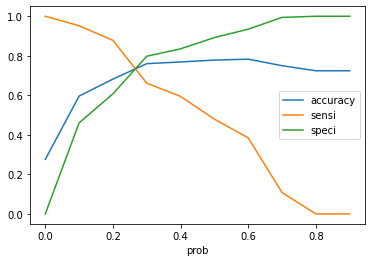

In [981]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.plot(cutoff_df['prob'], cutoff_df['accuracy'])
plt.plot(cutoff_df['prob'], cutoff_df['sensi'])
plt.plot(cutoff_df['prob'], cutoff_df['speci'])
plt.xlabel('prob')
plt.legend(['accuracy', 'sensi', 'speci'])
plt.show()

### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

<p style='text-align: right;'> 4 points</p>


In [982]:
# Now lets get another column with final_predicted which has 0.3 cutoff probability

y_pred_final['final_predicted'] = y_pred_final['Churn_Probability'].map(lambda x: 0 if x < 0.3 else 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [983]:
# print y_pred_final head
y_pred_final.head()

,CustID,Churn,Churn_Probability,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,939,0,0.534503,1,1,1,1,1,1,1,0,0,0,0,1
1,3724,1,0.292735,0,1,1,1,0,0,0,0,0,0,0,0
2,1756,0,0.013463,0,1,0,0,0,0,0,0,0,0,0,0
3,2278,1,0.700441,1,1,1,1,1,1,1,1,1,0,0,1
4,1867,0,0.022563,0,1,0,0,0,0,0,0,0,0,0,0


In [984]:
#Let's check the overall accuracy now again
print(metrics.accuracy_score(y_pred_final['Churn'], y_pred_final['final_predicted']))

0.7601895734597156


In [985]:
#Let's check the overall accuracy now again
print(metrics.confusion_matrix(y_pred_final['Churn'], y_pred_final['final_predicted']))

[[1219  309]
 [ 197  385]]


Though this approach of finding best cutoff probability is perfectly fine, but as you can see our error got increased when cutoff is 0.3. 


The reason may be the features which we used to predict. We need go back and check them again. Else we can even try out different classification problems. 


Lets try using all the features available before doing RFE. i.e consider all features in X




In [986]:
# Splitting the data into train and test with train_size=0.7 and random_state=100 again

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100)


In [987]:
#initialise Logistic Regression
logs2 = LogisticRegression()

#fitting model using above columns as input
logs2.fit(X_train, y_train)
#prediction on test data
y_pred= logs2.predict(X_test)

In [988]:
# print classification_report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1528
           1       0.66      0.52      0.58       582

    accuracy                           0.79      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.78      0.79      0.78      2110



In [989]:
#print confusion metrix
print(metrics.confusion_matrix(y_test, y_pred))

[[1370  158]
 [ 281  301]]


So from above result we can see that our results are improved slightly after using all the features in X

So in this assignment you learned when to use and how to use logistic regression and what all important metrics we can look for.

Well done buddy. So far so good.!

------------------------------

# Oh yeah! Congratulations you have made your first classification alogorithm! Very well done.

-------------------------------------

# Its Feedback Time!

We hope you’ve enjoyed this course so far. We’re committed to help you use "AI for All" course to its full potential, so that you have a great learning experience. And that’s why we need your help in form of a feedback here.

**Please fill this feedback form**
 https://zfrmz.in/MtRG5oWXBdesm6rmSM7N

_______________________________